In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#agosto13 = pd.read_csv('1308.csv')
#septiembre13 = pd.read_csv('1309.csv')
#octubre13 = pd.read_csv('1310.csv')
#noviembre13 = pd.read_csv('1311.csv')
#diciembre13 = pd.read_csv('1312.csv')
#enero14 = pd.read_csv('1401.csv')
#febrero14 = pd.read_csv('1402.csv')
#marzo14 = pd.read_csv('1403.csv')
#abril14 = pd.read_csv('1404.csv')
#mayo14 = pd.read_csv('1405.csv')
#junio14 = pd.read_csv('1406.csv')
#enero15 = pd.read_csv('1501.csv')
#agosto15 = pd.read_csv('1508.csv')
#marzo16 = pd.read_csv('1603.csv')
#abril16 = pd.read_csv('1604.csv')
#mayo16 = pd.read_csv('1605.csv')
#junio16 = pd.read_csv('1606.csv')
#enero17 = pd.read_csv('1701.csv')
#agosto17 = pd.read_csv('1708.csv')


agosto13 = pd.read_csv('resources/properati-AR-2013-08-01-properties-sell.csv')
septiembre13 = pd.read_csv('resources/properati-AR-2013-09-01-properties-sell.csv')
octubre13 = pd.read_csv('resources/properati-AR-2013-10-01-properties-sell.csv')
noviembre13 = pd.read_csv('resources/properati-AR-2013-11-01-properties-sell.csv')
diciembre13 = pd.read_csv('resources/properati-AR-2013-12-01-properties-sell.csv')
enero14 = pd.read_csv('resources/properati-AR-2014-01-01-properties-sell.csv')
febrero14 = pd.read_csv('resources/properati-AR-2014-02-01-properties-sell.csv')
marzo14 = pd.read_csv('resources/properati-AR-2014-03-01-properties-sell.csv')
abril14 = pd.read_csv('resources/properati-AR-2014-04-01-properties-sell.csv')
mayo14 = pd.read_csv('resources/properati-AR-2014-05-01-properties-sell.csv')
junio14 = pd.read_csv('resources/properati-AR-2014-06-01-properties-sell.csv')
enero15 = pd.read_csv('resources/properati-AR-2015-01-01-properties-sell-six_months.csv')
agosto15 = pd.read_csv('resources/properati-AR-2015-08-01-properties-sell-six_months.csv')
marzo16 = pd.read_csv('resources/properati-AR-2016-03-01-properties-sell-six_months.csv')
abril16 = pd.read_csv('resources/properati-AR-2016-04-01-properties-sell.csv')
mayo16 = pd.read_csv('resources/properati-AR-2016-05-01-properties-sell.csv')
junio16 = pd.read_csv('resources/properati-AR-2016-06-01-properties-sell.csv')
enero17 = pd.read_csv('resources/properati-AR-2017-07-01-properties-sell-six_months.csv')
agosto17 = pd.read_csv('resources/properati-AR-2017-08-01-properties-sell.csv')


datos = pd.concat([agosto13, septiembre13, octubre13, noviembre13, diciembre13, enero14, febrero14, \
                          marzo14, abril14, mayo14, junio14, enero15, agosto15, marzo16, abril16, mayo16, \
                          junio16, enero17, agosto17])

#datosForTesting = pd.read_csv('properati_dataset_testing_noprice.csv')



In [2]:
datosForTesting = pd.read_csv('resources/properati_dataset_testing_noprice.csv')

# Preparacion de Datos

Algunos primeros datos del set a testear. Vemos que los únicos campos con bajo porcentaje de datos son el piso y las expensas.

In [3]:
datos = datos.loc[:, ['id', 'created_on',  'property_type', 'operation', 'place_name', \
                      'place_with_parent_names', 'country_name', 'state_name', 'lat-lon', 'lat', 'lon', \
                     'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'description',\
                     'price_aprox_usd']]
datos.columns

Index(['id', 'created_on', 'property_type', 'operation', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor',
       'rooms', 'expenses', 'description', 'price_aprox_usd'],
      dtype='object')

In [4]:
datos['operation'] = datos['operation'].map(lambda x: 'venta' if x == 'sell' else 'alquiler')

In [5]:
datos = datos.loc[datos.property_type != 'store', :]

In [6]:
def traducirTipoPropiedad(x):
    tipo = ''
    if (x == 'house'):
        tipo = 'casa' 
    else:
        if (x == 'apartment'): 
            tipo = 'departamento'
        else: 
            if (x == 'PH'): 
                tipo = 'ph'
    return tipo

In [7]:
datos['property_type'] = datos['property_type'].map(traducirTipoPropiedad)
datos.loc[datos.property_type == 'casa','id'].count()

177850

In [8]:
datos = datos.loc[(datos['state_name'].str.contains('Capital Federal')| \
                   datos['state_name'].str.contains('Bs.As. G.B.A. Zona Sur')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Oeste')|\
                  datos['state_name'].str.contains('Buenos Aires Interior')|\
                  datos['state_name'].str.contains('Bs.As. G.B.A. Zona Norte')),:]
datos.count()

id                         335028
created_on                 335028
property_type              335028
operation                  335028
place_name                 334961
place_with_parent_names    335028
country_name               335028
state_name                 335028
lat-lon                    232012
lat                        232012
lon                        232012
surface_total_in_m2        237632
surface_covered_in_m2      288460
floor                       40757
rooms                      176131
expenses                    37242
description                335013
price_aprox_usd            304216
dtype: int64

In [9]:
datos = datos.loc[datos['price_aprox_usd'].notnull(),:]
datos = datos.loc[datos['price_aprox_usd'] != 0,:]
datos.count()

id                         291841
created_on                 291841
property_type              291841
operation                  291841
place_name                 291775
place_with_parent_names    291841
country_name               291841
state_name                 291841
lat-lon                    200121
lat                        200121
lon                        200121
surface_total_in_m2        209467
surface_covered_in_m2      259621
floor                       38541
rooms                      150166
expenses                    35503
description                291826
price_aprox_usd            291841
dtype: int64

In [10]:
#Se hace la comparacion por lat, lon, superficie y superficie cubierta, tengo que quitar los nulls de esos campos
datosSinNull = datos.loc[datos['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]

#  Pruebas Algoritmos

In [4]:
#Luego de esos divido los que estan en palermo de los que no estan en palermo
datosPalermo = datosSinNull.loc[datosSinNull.place_name == 'Palermo', :]
datosNoPalermo = datosSinNull.loc[datosSinNull.place_name != 'Palermo', :]

#Divido al set de palermo en otros features y precios
datosPalermoFeatures = datosPalermo.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosPalermoPrecio = datosPalermo.loc[:, ['price_aprox_usd']]

#Divido al set que no es de palermo en otros features y precios
datosNoPalermoFeatures = datosNoPalermo.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosNoPalermoPrecio = datosNoPalermo.loc[:, ['price_aprox_usd']]

In [11]:
#Importo todas las librerias correspondientes a ML
#Para score
from sklearn.metrics import r2_score

#Para training y cross
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#Algoritmos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn import gaussian_process
from sklearn import neural_network

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


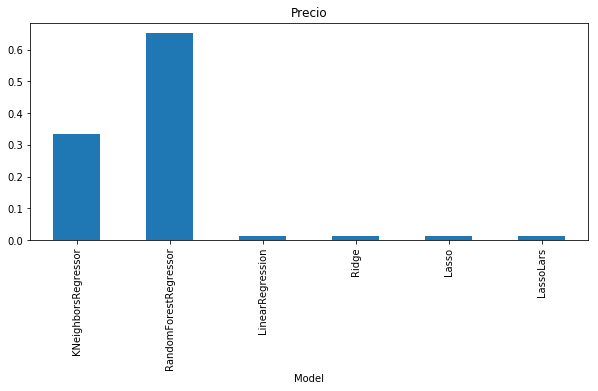

In [175]:
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         #RadiusNeighborsRegressor(),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1)]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(datosNoPalermoFeatures, datosNoPalermoPrecio)
        tmp['Precio'] = r2_score(datosPalermoPrecio, model.predict(datosPalermoFeatures))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optim

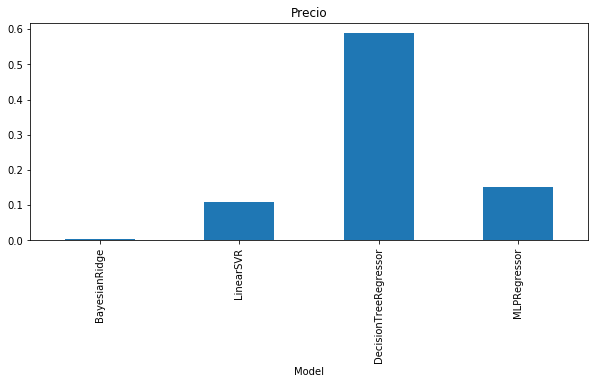

In [28]:
models = [linear_model.BayesianRidge(),
         #LogisticRegression(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         #gaussian_process.GaussianProcessRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(datosNoPalermoFeatures, datosNoPalermoPrecio)
        tmp['Precio'] = r2_score(datosPalermoPrecio, model.predict(datosPalermoFeatures))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

# Primeros tests con set de datos

In [176]:
#Split del set de datos prueba 1
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)

In [177]:
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


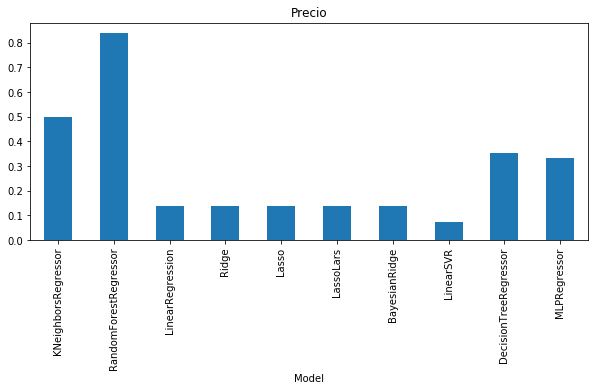

In [178]:
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

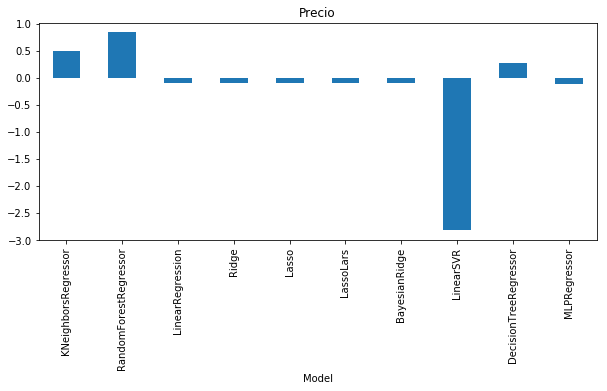

In [32]:
#Prueba 2
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


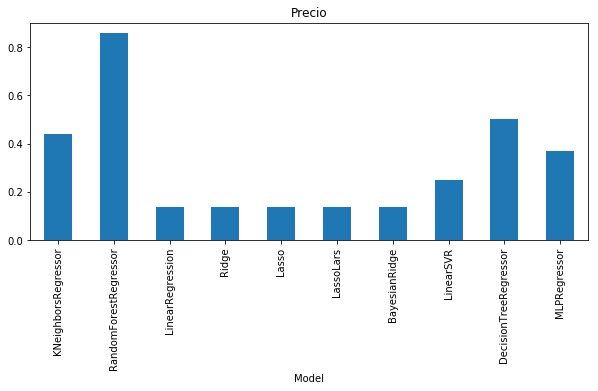

In [179]:
#Prueba 3
datosFiltrados = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',\
                                      'price_aprox_usd']]

x_train, x_test, y_train, y_test = train_test_split(datosFiltrados, datosFiltrados['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         LinearRegression(),
         linear_model.Ridge (alpha = .5),
         linear_model.Lasso (alpha = 0.1),
         linear_model.LassoLars (alpha = 0.1),
         linear_model.BayesianRidge(),
         svm.LinearSVR(),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')
plt.show()

In [33]:
datosFiltradosFeatures = datosFiltrados.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
datosFiltradosPrecios = datosFiltrados.loc[:, ['price_aprox_usd']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.39237995,  0.91701864,  0.88376643,  0.78635228,  0.82133644])

In [50]:
RFRModel = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.2584208 ,  0.91204237,  0.77484542,  0.66607409,  0.63041404])

In [48]:
RFRModel = RandomForestRegressor()
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.25138166,  0.88470325,  0.59708272,  0.67097637,  0.60537916])

In [49]:
RFRModel = RandomForestRegressor(n_estimators=50, max_features=2)
scores = cross_val_score(RFRModel, datosFiltradosFeatures, np.ravel(datosFiltradosPrecios), cv=5)
scores

array([ 0.31663359,  0.90991187,  0.79368348,  0.74809686,  0.63274897])

In [54]:
#primera estimacion al set de prueba
primeraPrueba = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

In [61]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(primeraPrueba)

array([[ -34.61098776,  -58.36346358,    0.        ,   64.        ],
       [ -34.612651  ,  -58.4432756 ,    0.        ,   64.        ],
       [ -34.58936332,  -58.41287986,   53.        ,   48.        ],
       ..., 
       [ -34.7585252 ,  -58.4097202 ,  219.        ,  135.        ],
       [ -34.56322108,  -58.46105268,   62.        ,   48.        ],
       [ -34.70919169,  -58.53028938,  367.        ,  130.        ]])

In [68]:
x_train, x_test, y_train, y_test = train_test_split(datosFiltrados.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2']], datosFiltrados['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba1 = RFRModel.predict(imp.fit_transform(primeraPrueba))
prueba1

array([ 307686.31166667,  159466.64      ,  185250.8197    , ...,
        167100.2048    ,  172813.33989524,  152105.        ])

# Primer Archivo Kaggle

In [79]:
archivo1 = pd.DataFrame()
archivo1['id'] = datosForTesting.loc[:,['id']]
archivo1['price_usd'] = prueba1
archivo1

,id,price_usd
0,3632,307686.311667
1,3633,159466.640000
2,2263404,185250.819700
3,2263405,83847.000000
4,2263406,141019.780741
5,2263407,83847.000000
6,2263408,83847.000000
7,2263409,83847.000000
8,2263410,139479.400000
9,2263411,109333.665000


In [85]:
archivo1.to_csv('prueba1.csv', index=False)

In [86]:
aVer = pd.read_csv('prueba1.csv')
aVer

,id,price_usd
0,3632,307686.311667
1,3633,159466.640000
2,2263404,185250.819700
3,2263405,83847.000000
4,2263406,141019.780741
5,2263407,83847.000000
6,2263408,83847.000000
7,2263409,83847.000000
8,2263410,139479.400000
9,2263411,109333.665000


#  Prueba Incluyendo lugares

In [130]:
#Creamos un place_name_id para agregar a la query
barrios = pd.concat([pd.DataFrame([[barrio,0]], columns=['place_name','place_name_id']) for barrio in datosSinNull['place_name'].unique()]).reset_index()
barrios['place_name_id'] = barrios.index
barrios = barrios.loc[:,['place_name','place_name_id']]
barrios.head()

,place_name,place_name_id
0,Tres de Febrero,0
1,Maschwitz,1
2,La Matanza,2
3,Vicente López,3
4,Florida,4


In [131]:
datosWithPlaces = pd.merge(datosSinNull,barrios,how='left',on='place_name')

In [132]:
datosFiltradosWithPlaces = datosWithPlaces.loc[:, ['lat', 'lon','surface_covered_in_m2','surface_total_in_m2','price_aprox_usd','place_name_id']]

# Entrenamiento

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


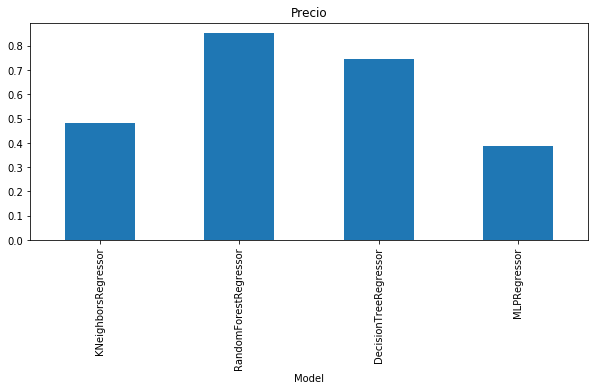

In [206]:
#Prueba 4

x_train, x_test, y_train, y_test = train_test_split(datosFiltradosWithPlaces, datosFiltradosWithPlaces['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')


In [38]:
datosFiltradosWithPlacesFeatures = datosFiltradosWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id']]
datosFiltradosWithPlacesPrecios = datosFiltradosWithPlaces.loc[:, ['price_aprox_usd']]
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

scores = cross_val_score(RFRModel, datosFiltradosWithPlacesFeatures, np.ravel(datosFiltradosWithPlacesPrecios), cv=5)

scores

array([ 0.39624942,  0.92108453,  0.8808242 ,  0.80555798,  0.82240923])

# Test con set de pruebas 

In [148]:
datosForTestingWithPlaces = pd.merge(datosForTesting,barrios,how='left',on='place_name')

In [37]:
segundaPrueba = datosForTestingWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id']]


imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(segundaPrueba)


RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

x_train, x_test, y_train, y_test = train_test_split(datosFiltradosWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id']], datosFiltradosWithPlaces['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba2 = RFRModel.predict(imp.fit_transform(segundaPrueba))


In [211]:
archivo2 = pd.DataFrame()
archivo2['id'] = datosForTesting.loc[:,['id']]
archivo2['price_usd'] = prueba2
archivo2.to_csv('prueba2.csv', index=False)

# Prueba con Tipo de propiedad

In [44]:
#Transformamos tipo de propiedad a numerico

def tipoPropiedadToNumeric(x):
    tipo = ''
    if (x == 'house' or x== 'casa'):
        tipo = 1 
    else:
        if (x == 'apartment' or x == 'departamento'): 
            tipo = 2
        else: 
            if (x == 'PH' or x == 'ph'): 
                tipo = 3
    return tipo

datosWithPlaces['property_type_id'] = datosWithPlaces['property_type'].map(tipoPropiedadToNumeric)
datosFiltradosWithPlacesAndType =  datosWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','price_aprox_usd','place_name_id','property_type_id']]

# Entrenamiento

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


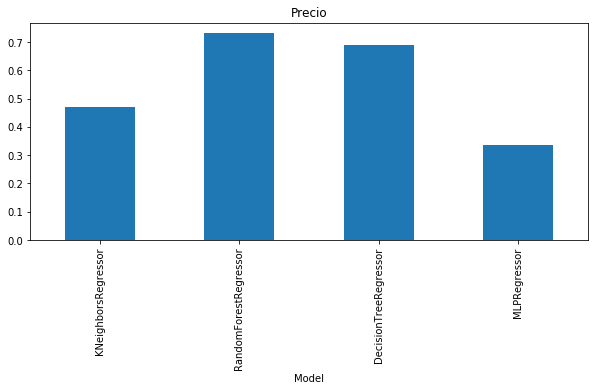

In [30]:
#Prueba 5

x_train, x_test, y_train, y_test = train_test_split(datosFiltradosWithPlacesAndType, datosFiltradosWithPlacesAndType['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')


In [31]:
datosFiltradosWithPlacesAndTypeFeatures = datosFiltradosWithPlacesAndType.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id']]
datosFiltradosWithPlacesAndTypePrecios = datosFiltradosWithPlacesAndType.loc[:, ['price_aprox_usd']]

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosFiltradosWithPlacesAndTypeFeatures, np.ravel(datosFiltradosWithPlacesAndTypePrecios), cv=5)
scores

array([ 0.41323242,  0.9196746 ,  0.88601513,  0.82634754,  0.83008036])

# Test con Set de Pruebas

In [51]:
datosForTestingWithPlaces['property_type_id'] = datosForTestingWithPlaces['property_type'].map(tipoPropiedadToNumeric)

In [53]:
terceraPrueba = datosForTestingWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id']]


imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(terceraPrueba)


RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

x_train, x_test, y_train, y_test = train_test_split(datosFiltradosWithPlacesAndType.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id']], datosFiltradosWithPlacesAndType['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba3 = RFRModel.predict(imp.fit_transform(terceraPrueba))

In [54]:
archivo3 = pd.DataFrame()
archivo3['id'] = datosForTesting.loc[:,['id']]
archivo3['price_usd'] = prueba3
archivo3.to_csv('prueba3.csv', index=False)

# Agregamos fecha de Creacion

In [56]:
datosWithPlaces.columns

Index(['country_name', 'created_on', 'currency', 'description', 'expenses',
       'floor', 'geonames_id', 'id', 'image_thumbnail', 'lat', 'lat-lon',
       'lon', 'operation', 'place_name', 'place_with_parent_names', 'price',
       'price_aprox_local_currency', 'price_aprox_usd', 'price_per_m2',
       'price_usd_per_m2', 'properati_url', 'property_type', 'rooms',
       'state_name', 'surface_covered_in_m2', 'surface_in_m2',
       'surface_total_in_m2', 'title', 'place_name_id', 'property_type_id'],
      dtype='object')

In [58]:
datosWithPlaces['year'] = pd.DatetimeIndex(datosWithPlaces['created_on']).year
datosWithPlaces['month'] = pd.DatetimeIndex(datosWithPlaces['created_on']).month
datosWithPlaces.head()

,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,lat,...,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title,place_name_id,property_type_id,year,month
0,Argentina,2014-07-02,USD,CODIGO: 1520-MYR1925 ubicado en: Ferre 600 - ...,NaN,NaN,3433321.0,4ba89da8e0e5f0677f3bf9b8da4e14c0ffc08ca1,https://thumbs4.properati.com/7/aAPUkWdVteaoRr...,-34.787505,...,NaN,Bs.As. G.B.A. Zona Sur,325.0,NaN,375.0,Chalet de 3 dormitorios. Impecable. Lote doble...,0,1,2014,7
1,Argentina,2014-07-02,USD,CODIGO: ubicado en: Roosevelt 2500 - Publica...,700,NaN,3436077.0,4c508b233a1495e7ba016684ae7a43c4bcc2f26c,https://thumbs4.properati.com/7/heY_J3kb1D7Efi...,-34.558140,...,NaN,Capital Federal,42.0,NaN,46.0,Excelente 2 Ambientes c/baulera,1,2,2014,7
2,Argentina,2014-07-02,USD,CODIGO: ubicado en: Uriarte 1500 - Publicado...,NaN,NaN,3430234.0,1e0ec350dd33b32977e6da279fdd9e4ebf870d0d,https://thumbs4.properati.com/3/1c50vLZ65H3yTp...,-34.588129,...,NaN,Capital Federal,34.0,NaN,49.0,PH de 2 Ambientes en Palermo Soho,2,3,2014,7
3,Argentina,2014-07-02,USD,CODIGO: 2388-LLG0925 ubicado en: COLON 660 - ...,NaN,NaN,3435894.0,d8470085f8f543f16e0d28b7f38fb2354ab9ce92,https://thumbs4.properati.com/8/scNgGnwSxK3fVP...,-34.827373,...,NaN,Bs.As. G.B.A. Zona Sur,230.0,NaN,523.0,CHALET EN INMEJORABLE UBICACION A 150 MTS DE L...,3,1,2014,7
4,Argentina,2014-07-02,USD,CODIGO: ubicado en: CONCORDIA 4700 - Publica...,NaN,NaN,3427451.0,4efac79c0ede6d23f5ef3f9b57096fd6ef503cb0,https://thumbs4.properati.com/1/R24bt8zXYcy6JG...,-34.591155,...,NaN,Capital Federal,52.0,NaN,57.0,"DEPARTAMENTO 3 AMBIENTES 57M2 EN V DEVOTO, BA...",4,2,2014,7


In [59]:

datosFiltradosWithDate =  datosWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','price_aprox_usd','place_name_id','property_type_id','year','month']]

# Entrenamiento

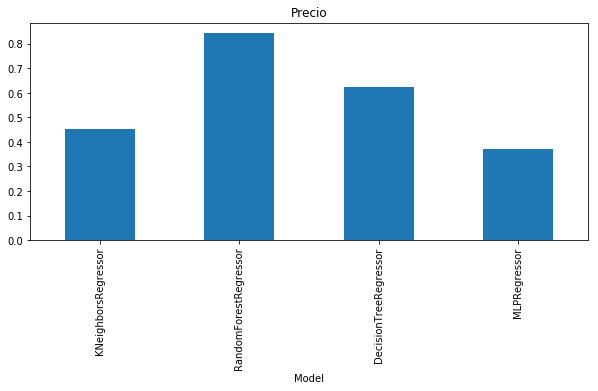

In [60]:
x_train, x_test, y_train, y_test = train_test_split(datosFiltradosWithDate, datosFiltradosWithDate['price_aprox_usd'], test_size=0.2)
x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id','year','month']]
x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id','year','month']]
models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')


In [61]:
datosFiltradosWithDateFeatures = datosFiltradosWithDate.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id','year','month']]
datosFiltradosWithDatePrecios = datosFiltradosWithDate.loc[:, ['price_aprox_usd']]

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosFiltradosWithDateFeatures, np.ravel(datosFiltradosWithDatePrecios), cv=5)
scores

array([ 0.40077163,  0.93274365,  0.89799032,  0.82681386,  0.83257868])

# # Test con Set de Pruebas

In [62]:
datosForTestingWithPlaces['year'] = pd.DatetimeIndex(datosForTestingWithPlaces['created_on']).year
datosForTestingWithPlaces['month'] = pd.DatetimeIndex(datosForTestingWithPlaces['created_on']).month

In [66]:
cuartaPrueba = datosForTestingWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id','year','month']]


imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(cuarta)


RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')

x_train, x_test, y_train, y_test = train_test_split(datosFiltradosWithDateFeatures.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id','year','month']], datosFiltradosWithDatePrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba4 = RFRModel.predict(imp.fit_transform(cuartaPrueba))

In [67]:
archivo4 = pd.DataFrame()
archivo4['id'] = datosForTesting.loc[:,['id']]
archivo4['price_usd'] = prueba4
archivo4.to_csv('prueba4.csv', index=False)

# Feature extraction

In [95]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=10, input_type='string')
result = fh.fit_transform(barrios)
print(result)

  (0, 0)	2.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	-1.0
  (0, 6)	0.0
  (0, 7)	-1.0
  (0, 9)	2.0
  (1, 0)	2.0
  (1, 1)	-1.0
  (1, 2)	1.0
  (1, 3)	2.0
  (1, 4)	-1.0
  (1, 6)	0.0
  (1, 7)	-1.0
  (1, 9)	3.0


# Habitaciones

In [143]:
datosWithPlacesAndRooms = datosWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','price_aprox_usd','place_name_id','property_type','year','month','rooms']]

datosWithPlacesAndRooms =  datosWithPlacesAndRooms.loc[datosWithPlacesAndRooms['rooms'].notnull(),:]

datosWithPlacesAndRooms = datosWithPlacesAndRooms.loc[datosWithPlacesAndRooms.property_type != 'store', :]
datosWithPlacesAndRoomsOHC= pd.get_dummies(datosWithPlacesAndRooms, prefix=['property_type'])

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


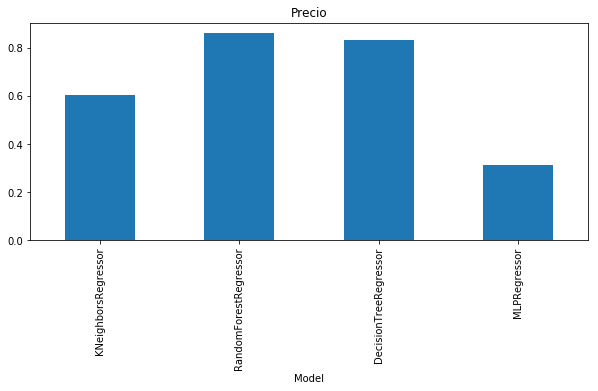

In [144]:
#Prueba 6

#x_train, x_test, y_train, y_test = train_test_split(datosWithPlacesAndRooms, datosWithPlacesAndRooms['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id','year','month','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id','year','month','rooms']]

x_train, x_test, y_train, y_test = train_test_split(datosWithPlacesAndRoomsOHC, datosWithPlacesAndRoomsOHC['price_aprox_usd'], test_size=0.2)
x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [169]:
#datosFiltradosWithDateAndRoomsFeatures = datosWithPlacesAndRooms.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type_id','year','month','rooms']]
#datosFiltradosWithDateAndRoomsPrecios = datosWithPlacesAndRooms.loc[:, ['price_aprox_usd']]

datosWithPlacesAndRoomsOHCFeatures = datosWithPlacesAndRoomsOHC.drop('price_aprox_usd',1)
datosWithPlacesAndRoomsOHCPrecios = datosWithPlacesAndRoomsOHC.loc[:, ['price_aprox_usd']]


RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosWithPlacesAndRoomsOHCFeatures, np.ravel(datosWithPlacesAndRoomsOHCPrecios), cv=5)
scores

array([ 0.33930928,  0.9607647 ,  0.88604265,  0.81940946,  0.88699178])

# Test con Set de Pruebas

In [114]:
datosForTestingGrandes = datosForTestingWithPlaces[datosForTestingWithPlaces['rooms'] > 6]
datosForTestingGrandes.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,...,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description,place_name_id,property_type_id,year,month
203,2264992,2017-08-01,departamento,venta,Congreso,|Argentina|Capital Federal|Congreso|,Argentina,Capital Federal,"-34.6154366495,-58.3888295497",-34.615437,...,276.0,266.0,NaN,7.0,NaN,Excelente Semipiso de Categoría7 ambientes de ...,21.0,2,2017,8
415,2265978,2017-08-01,ph,venta,San Nicolás,|Argentina|Capital Federal|San Nicolás|,Argentina,Capital Federal,"-34.6062189,-58.383506",-34.606219,...,538.0,266.0,NaN,7.0,NaN,"PH en edificio histórico, ubicado a 4 cuadras ...",121.0,3,2017,8
491,2266447,2017-08-01,departamento,venta,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,"-34.5664200446,-58.4322408121",-34.566420,...,498.0,434.0,NaN,7.0,300000,Venta de Departamento 7 AMBIENTES O MAS en Pal...,24.0,2,2017,8
1071,2270115,2017-08-02,departamento,venta,Palermo Chico,|Argentina|Capital Federal|Palermo|Palermo Chico|,Argentina,Capital Federal,"-34.5764683,-58.4070234",-34.576468,...,350.0,284.0,NaN,8.0,NaN,Espectacular dúplex más terraza privada con p...,129.0,2,2017,8
1085,2270235,2017-08-02,departamento,venta,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,"-34.5892011,-58.389136",-34.589201,...,139.0,139.0,NaN,7.0,NaN,"HALL, LIVING COMEDOR Y ESCRITORIO, 2 DORMITORI...",85.0,2,2017,8


In [174]:
datosForTestingWithPlacesAndR = datosForTestingWithPlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','place_name_id','property_type','year','month','rooms']]

datosForTestingWithPlacesAndOHC = pd.get_dummies(datosForTestingWithPlacesAndR, prefix=['property_type'])

datosWithPlacesAndRoomsOHCFeatures.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',
       'place_name_id', 'year', 'month', 'rooms', 'property_type_casa',
       'property_type_departamento', 'property_type_ph'],
      dtype='object')

In [175]:
datosForTestingWithPlacesAndOHC.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',
       'place_name_id', 'year', 'month', 'rooms', 'property_type_casa',
       'property_type_departamento', 'property_type_ph'],
      dtype='object')

In [177]:
datosWithPlacesAndRoomsOHCFeatures.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',
       'place_name_id', 'year', 'month', 'rooms', 'property_type_casa',
       'property_type_departamento', 'property_type_ph'],
      dtype='object')

In [179]:
quintaPrueba21.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',
       'place_name_id', 'year', 'month', 'rooms', 'property_type_casa',
       'property_type_departamento', 'property_type_ph'],
      dtype='object')

In [176]:
quintaPrueba = datosForTestingFecha

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(quintaPrueba)


RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(datosSinNullConFechasFeatures, datosSinNullConFechasPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba5 = RFRModel.predict(imp.fit_transform(quintaPrueba))

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 9 

In [111]:
archivo51 = pd.DataFrame()
archivo51['id'] = datosForTesting.loc[:,['id']]
archivo51['price_usd'] = prueba51
archivo51.to_csv('prueba51.csv', index=False)

# Datos sin places

In [84]:
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['price_aprox_usd'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]
datosSinNull['year'] = pd.DatetimeIndex(datosSinNull['created_on']).year
datosSinNull['month'] = pd.DatetimeIndex(datosSinNull['created_on']).month

datosSinNullConFechas = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd', 'surface_covered_in_m2','property_type','year','month']]

In [85]:

datosSinNullConFechas = pd.get_dummies(datosSinNullConFechas, prefix=['property_type'])
datosSinNullConFechas.head()

,lat,lon,surface_total_in_m2,price_aprox_usd,surface_covered_in_m2,year,month,property_type_casa,property_type_departamento,property_type_ph
12,-34.787505,-58.373606,375.0,450000.0,325.0,2014,7,1,0,0
14,-34.558140,-58.461494,46.0,96000.0,42.0,2014,7,0,1,0
15,-34.588129,-58.433152,49.0,120000.0,34.0,2014,7,0,0,1
17,-34.827373,-58.393529,523.0,300000.0,230.0,2014,7,1,0,0
21,-34.591155,-58.510174,57.0,155000.0,52.0,2014,7,0,1,0


AttributeError: 'function' object has no attribute 'values'

# Entrenamiento

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


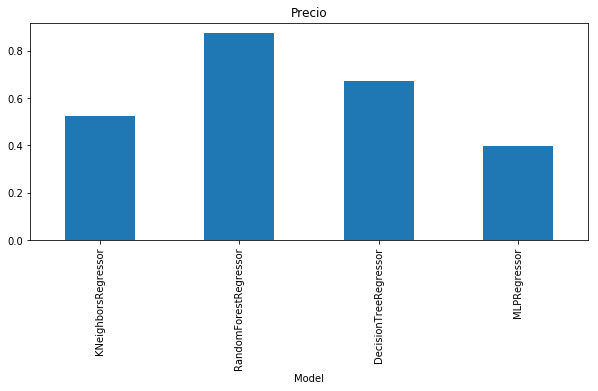

In [86]:
#Prueba 7

x_train, x_test, y_train, y_test = train_test_split(datosSinNullConFechas, datosSinNullConFechas['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [87]:
datosSinNullConFechasFeatures = datosSinNullConFechas.drop('price_aprox_usd',1)
datosSinNullConFechasPrecios = datosSinNullConFechas.loc[:, ['price_aprox_usd']]

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosSinNullConFechasFeatures, np.ravel(datosSinNullConFechasPrecios), cv=5)
scores

array([ 0.38766737,  0.94024533,  0.9014026 ,  0.82327816,  0.83647658])

In [91]:
datosSinNullConFechasFeatures.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'year',
       'month', 'property_type_casa', 'property_type_departamento',
       'property_type_ph'],
      dtype='object')

# Test de datos de pruebas

In [88]:
datosForTesting['year'] = pd.DatetimeIndex(datosForTesting['created_on']).year
datosForTesting['month'] = pd.DatetimeIndex(datosForTesting['created_on']).month
datosForTestingFecha = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type','year','month']]
datosForTestingFecha = pd.get_dummies(datosForTestingFecha, prefix=['property_type'])
datosForTestingFecha.head()

,lat,lon,surface_total_in_m2,surface_covered_in_m2,year,month,property_type_casa,property_type_departamento,property_type_ph
0,-34.610988,-58.363464,0.0,NaN,2017,8,0,1,0
1,NaN,NaN,0.0,NaN,2017,8,0,1,0
2,-34.589363,-58.412880,53.0,48.0,2017,8,0,1,0
3,NaN,NaN,39.0,39.0,2017,8,0,1,0
4,NaN,NaN,51.0,51.0,2017,8,0,1,0


In [92]:
sextaPrueba = datosForTestingFecha

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(sextaPrueba)


RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(datosSinNullConFechasFeatures, datosSinNullConFechasPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba6 = RFRModel.predict(imp.fit_transform(sextaPrueba))

In [93]:
archivo6 = pd.DataFrame()
archivo6['id'] = datosForTesting.loc[:,['id']]
archivo6['price_usd'] = prueba6
archivo6.to_csv('prueba6.csv', index=False)

# One Hot Coding con  Barrios

In [121]:
datosSinNull = datosSinNull.loc[datosSinNull['lon'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_total_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['price_aprox_usd'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['lat'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['surface_covered_in_m2'].notnull(),:]
datosSinNull = datosSinNull.loc[datosSinNull['rooms'].notnull(),:]
datosSinNull['year'] = pd.DatetimeIndex(datosSinNull['created_on']).year
datosSinNull['month'] = pd.DatetimeIndex(datosSinNull['created_on']).month

datosSinNullOHC = datosSinNull.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd', 'place_name' ,'surface_covered_in_m2','property_type','year','month','rooms']]

In [122]:
datosSinNullOHCWithDummies = pd.get_dummies(datosSinNullOHC)




In [120]:
datosSinNullOHCWithDummies.rooms.isnull().values.any()

True

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


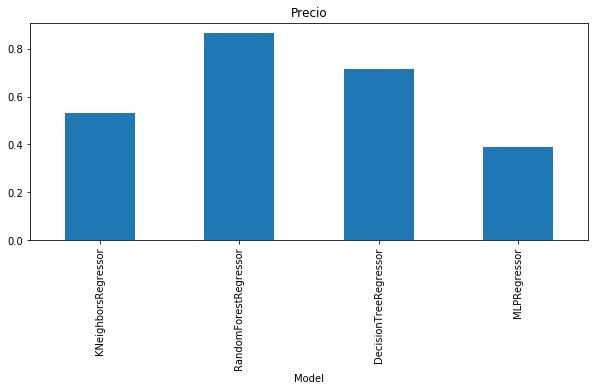

In [123]:
#Prueba 8

x_train, x_test, y_train, y_test = train_test_split(datosSinNullOHCWithDummies, datosSinNullOHCWithDummies['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [124]:
datosSinNullOHCWithDummiesFeatures = datosSinNullOHCWithDummies.drop('price_aprox_usd',1)
datosSinNullOHCWithDummiesPrecios = datosSinNullOHCWithDummies.loc[:, ['price_aprox_usd']]

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosSinNullOHCWithDummiesFeatures, np.ravel(datosSinNullOHCWithDummiesPrecios), cv=5)
scores

array([ 0.34810912,  0.96118896,  0.88521832,  0.80146185,  0.8715518 ])

# Prueba con set de datos de test

In [125]:
datosForTesting['year'] = pd.DatetimeIndex(datosForTesting['created_on']).year
datosForTesting['month'] = pd.DatetimeIndex(datosForTesting['created_on']).month
datosForTestingOHC = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2','place_name' ,'surface_covered_in_m2','property_type','year','month','rooms']]
datosForTestingOHC = pd.get_dummies(datosForTestingOHC)

# Entrenamiento

In [128]:
septimaPrueba = datosForTestingOHC

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(septimaPrueba)
impColumns = Imputer()
impColumns.fit_transform(septimaPrueba)
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(datosSinNullOHCWithDummiesFeatures, datosSinNullOHCWithDummiesPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba7 = RFRModel.predict(imp.fit_transform(septimaPrueba))

ValueError: Number of features of the model must match the input. Model n_features is 460 and input n_features is 233 

In [ ]:
archivo7 = pd.DataFrame()
archivo7['id'] = datosForTesting.loc[:,['id']]
archivo7['price_usd'] = prueba7
archivo7.to_csv('prueba7.csv', index=False)

# Type y Barrios con OHC

Index(['id', 'created_on', 'property_type', 'operation', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'lat-lon',
       'lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor',
       'rooms', 'expenses', 'description', 'price_aprox_usd'],
      dtype='object')

In [109]:
datosSinNull['year'] = pd.DatetimeIndex(datosSinNull['created_on']).year
datosSinNull['month'] = pd.DatetimeIndex(datosSinNull['created_on']).month

def split_place_with_parent_names_localidad(x):
    z=x.split("|")
    return z[3]

datosSinNull['localidad'] = datosSinNull['place_with_parent_names'].map(split_place_with_parent_names_localidad)
datosForTesting['localidad'] = datosForTesting['place_with_parent_names'].map(split_place_with_parent_names_localidad)

In [110]:
localidades = datosForTesting['localidad'].unique()


def localidadEnSet(x):
    return x in localidades.tolist()


datosSinNull['localidadEnSet'] = datosSinNull['localidad'].map(localidadEnSet)
datosSamePlaces = datosSinNull.loc[datosSinNull['localidadEnSet'] == True, :]


In [113]:
datosSamePlacesFiltered = datosSamePlaces.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd', 'localidad' ,'surface_covered_in_m2','property_type','year','month']]
datosSamePlacesFiltered = pd.get_dummies(datosSamePlacesFiltered)

datosSamePlacesFiltered.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'price_aprox_usd',
       'surface_covered_in_m2', 'year', 'month', 'localidad_',
       'localidad_Abasto', 'localidad_Agronomía', 'localidad_Almagro',
       'localidad_Almirante Brown', 'localidad_Avellaneda',
       'localidad_Balvanera', 'localidad_Barracas', 'localidad_Barrio Norte',
       'localidad_Belgrano', 'localidad_Berazategui', 'localidad_Boca',
       'localidad_Boedo', 'localidad_Caballito', 'localidad_Cañuelas',
       'localidad_Centro / Microcentro', 'localidad_Chacarita',
       'localidad_Coghlan', 'localidad_Colegiales', 'localidad_Congreso',
       'localidad_Constitución', 'localidad_Esteban Echeverría',
       'localidad_Ezeiza', 'localidad_Florencio Varela', 'localidad_Flores',
       'localidad_Floresta', 'localidad_General Rodríguez',
       'localidad_General San Martín', 'localidad_Hurlingham',
       'localidad_Ituzaingó', 'localidad_La Matanza', 'localidad_La Plata',
       'localidad_Lanús', 'localidad_Las Ca

# Entrenamiento

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


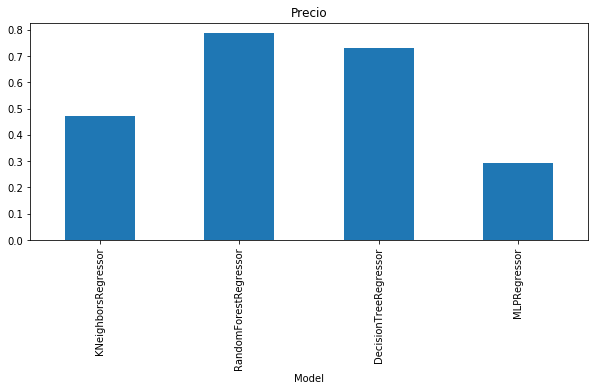

In [117]:
#Prueba 9

x_train, x_test, y_train, y_test = train_test_split(datosSamePlacesFiltered, datosSamePlacesFiltered['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [118]:
datosSamePlacesFilteredFeatures = datosSamePlacesFiltered.drop('price_aprox_usd',1)
datosSamePlacesFilteredPrecios = datosSamePlacesFiltered.loc[:, ['price_aprox_usd']]

In [119]:
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosSamePlacesFilteredFeatures, np.ravel(datosSamePlacesFilteredPrecios), cv=5)
scores

array([ 0.34523362,  0.95159897,  0.89140769,  0.8496383 ,  0.83309986])

# Preparamos set de Test

In [122]:
datosForTesting['year'] = pd.DatetimeIndex(datosForTesting['created_on']).year
datosForTesting['month'] = pd.DatetimeIndex(datosForTesting['created_on']).month

datosForTestingFiltered = datosForTesting.loc[:, ['lat', 'lon', 'surface_total_in_m2','property_type' ,'localidad' ,'surface_covered_in_m2','year','month']]
datosForTestingFiltered = pd.get_dummies(datosForTestingFiltered)

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'year',
       'month', 'place_name_9 de Abril', 'place_name_Abasto',
       'place_name_Abril Club de Campo', 'place_name_Adrogué',
       ...
       'place_name_Villa Tesei', 'place_name_Villa Udaondo',
       'place_name_Villa Urquiza', 'place_name_Villa del Parque',
       'place_name_Virrey del Pino', 'place_name_Wilde',
       'place_name_William Morris', 'property_type_casa',
       'property_type_departamento', 'property_type_ph'],
      dtype='object', length=222)

# Entrenamiento

In [124]:
octavaPrueba = datosForTestingFiltered

imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(octavaPrueba)
impColumns = Imputer()
impColumns.fit_transform(octavaPrueba)
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(datosSamePlacesFilteredFeatures, datosSamePlacesFilteredPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba8 = RFRModel.predict(imp.fit_transform(octavaPrueba))

In [126]:
archivo8 = pd.DataFrame()
archivo8['id'] = datosForTesting.loc[:,['id']]
archivo8['price_usd'] = prueba8
archivo8.to_csv('prueba8.csv', index=False)

# Agrupamos por Comunas

In [14]:

datosSinNull['year'] = pd.DatetimeIndex(datosSinNull['created_on']).year
datosSinNull['month'] = pd.DatetimeIndex(datosSinNull['created_on']).month


datosForTesting['year'] = pd.DatetimeIndex(datosForTesting['created_on']).year
datosForTesting['month'] = pd.DatetimeIndex(datosForTesting['created_on']).month

comunas = pd.read_csv('resources/comunas.csv')

In [15]:
datosSinNull['state_name'].unique()

array(['Bs.As. G.B.A. Zona Sur', 'Capital Federal',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste',
       'Buenos Aires Interior'], dtype=object)

In [16]:
datosSinNull['tipo'] = 'train'
datosForTesting['tipo'] = 'test'
concat_df = pd.concat([datosSinNull , datosForTesting])

In [17]:
datosConComunas = pd.merge(concat_df, comunas, left_on='place_name', right_on='barrio',how='left')

In [18]:
datosConComunas['state_name'].unique()

array(['Bs.As. G.B.A. Zona Sur', 'Capital Federal',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste',
       'Buenos Aires Interior'], dtype=object)

In [19]:
datosConComunas.loc[datosConComunas['barrio'].isnull(), 'barrio'] = datosConComunas['state_name']
datosConComunas.loc[datosConComunas['state_name'] == 'Bs.As. G.B.A. Zona Sur', 'comuna'] = '17' 
datosConComunas.loc[datosConComunas['state_name'] == 'Bs.As. G.B.A. Zona Norte', 'comuna'] = '18'
datosConComunas.loc[datosConComunas['state_name'] == 'Bs.As. G.B.A. Zona Oeste', 'comuna'] = '19'
datosConComunas.loc[datosConComunas['state_name'] == 'Buenos Aires Interior', 'comuna'] = '20'
datosConComunas.loc[:, 'comuna'] = 'Comuna '+ datosConComunas['comuna'].astype(str)

In [20]:
datosConComunasFiltered = datosConComunas.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd','surface_covered_in_m2','property_type','comuna','year','month','tipo']]

In [285]:
datosConComunasFilteredOHC = pd.get_dummies(datosConComunasFiltered)
#datosConComunasFilteredOHC.columns

trainConComunas = datosConComunasFilteredOHC[datosConComunasFilteredOHC['tipo_train'] == 1]
testConComunas = datosConComunasFilteredOHC[datosConComunasFilteredOHC['tipo_test'] == 1]

# Drop your labels
trainConComunas = trainConComunas.drop(['tipo_train','tipo_test'], axis=1)
testConComunas = testConComunas.drop(['tipo_train','tipo_test'], axis=1)

trainConComunas.columns.size

30

In [242]:
testConComunas.columns.size

30

# Entrenamiento

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


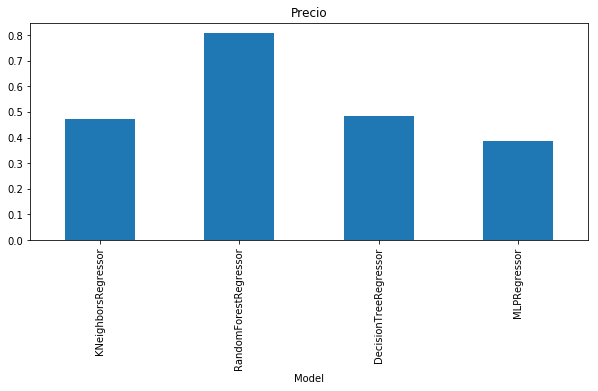

In [228]:
#Prueba 9

x_train, x_test, y_train, y_test = train_test_split(trainConComunas, trainConComunas['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [286]:
datosOHCFeatures = trainConComunas.drop('price_aprox_usd',1)
datosOHCPrecios = trainConComunas.loc[:, ['price_aprox_usd']]

In [287]:

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosOHCFeatures, np.ravel(datosOHCPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.39202364,  0.94052559,  0.8970258 ,  0.8269647 ,  0.83793984])

# Set de Pruebas

In [231]:
testConComunas.head()

,lat,lon,surface_total_in_m2,price_aprox_usd,surface_covered_in_m2,year,month,property_type_casa,property_type_departamento,property_type_ph,...,comuna_Comuna 19,comuna_Comuna 2.0,comuna_Comuna 20,comuna_Comuna 3.0,comuna_Comuna 4.0,comuna_Comuna 5.0,comuna_Comuna 6.0,comuna_Comuna 7.0,comuna_Comuna 8.0,comuna_Comuna 9.0
131071,-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
131072,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,1,0,...,0,0,1,0,0,0,0,0,0,0
131073,-34.589363,-58.412880,53.0,NaN,48.0,NaN,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
131074,NaN,NaN,39.0,NaN,39.0,NaN,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
131075,NaN,NaN,51.0,NaN,51.0,NaN,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0


,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...


# Entrenamiento

In [296]:
novenaPrueba = testConComunas.drop('price_aprox_usd', axis=1)
novenaPrueba.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'year',
       'month', 'property_type_casa', 'property_type_departamento',
       'property_type_ph', 'comuna_Comuna 1.0', 'comuna_Comuna 10.0',
       'comuna_Comuna 11.0', 'comuna_Comuna 12.0', 'comuna_Comuna 13.0',
       'comuna_Comuna 14.0', 'comuna_Comuna 15.0', 'comuna_Comuna 16.0',
       'comuna_Comuna 17', 'comuna_Comuna 18', 'comuna_Comuna 19',
       'comuna_Comuna 2.0', 'comuna_Comuna 20', 'comuna_Comuna 3.0',
       'comuna_Comuna 4.0', 'comuna_Comuna 5.0', 'comuna_Comuna 6.0',
       'comuna_Comuna 7.0', 'comuna_Comuna 8.0', 'comuna_Comuna 9.0'],
      dtype='object')

In [295]:
datosOHCFeatures.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'year',
       'month', 'property_type_casa', 'property_type_departamento',
       'property_type_ph', 'comuna_Comuna 1.0', 'comuna_Comuna 10.0',
       'comuna_Comuna 11.0', 'comuna_Comuna 12.0', 'comuna_Comuna 13.0',
       'comuna_Comuna 14.0', 'comuna_Comuna 15.0', 'comuna_Comuna 16.0',
       'comuna_Comuna 17', 'comuna_Comuna 18', 'comuna_Comuna 19',
       'comuna_Comuna 2.0', 'comuna_Comuna 20', 'comuna_Comuna 3.0',
       'comuna_Comuna 4.0', 'comuna_Comuna 5.0', 'comuna_Comuna 6.0',
       'comuna_Comuna 7.0', 'comuna_Comuna 8.0', 'comuna_Comuna 9.0'],
      dtype='object')

29

In [266]:
trainConComunas.columns.size
sinPrecio = trainConComunas.drop('price_aprox_usd',axis=1)

In [300]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(novenaPrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(datosOHCFeatures, datosOHCPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba9 = RFRModel.predict(imp.fit_transform(novenaPrueba))

In [301]:
archivo9 = pd.DataFrame()
archivo9['id'] = datosForTesting.loc[:,['id']]
archivo9['price_usd'] = prueba9
archivo9.to_csv('prueba9.csv', index=False)

# Expensas

In [34]:
datosConComunasFiltered = datosConComunas.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd','surface_covered_in_m2','property_type','comuna','year','month','tipo', 'expenses']]
datosConComunasFilteredOHC = pd.get_dummies(datosConComunasFiltered)


trainConComunasyExpenses = datosConComunasFilteredOHC[datosConComunasFilteredOHC['tipo_train'] == 1]
testConComunasyExpenses = datosConComunasFilteredOHC[datosConComunasFilteredOHC['tipo_test'] == 1]


trainConComunasyExpenses = trainConComunasyExpenses.drop(['tipo_train','tipo_test'], axis=1)
testConComunasyExpenses = testConComunasyExpenses.drop(['tipo_train','tipo_test'], axis=1)



C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


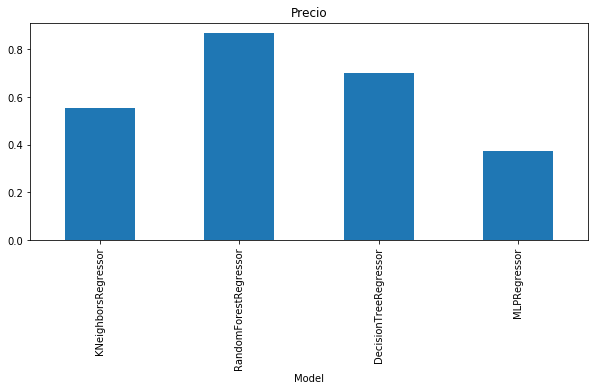

In [38]:
#Prueba 10

x_train, x_test, y_train, y_test = train_test_split(trainConComunasyExpenses, trainConComunasyExpenses['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [39]:
datosExpensesFeatures = trainConComunasyExpenses.drop('price_aprox_usd',1)
datosExpensesPrecios = trainConComunasyExpenses.loc[:, ['price_aprox_usd']]

In [40]:
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, datosExpensesFeatures, np.ravel(datosExpensesPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.39319107,  0.93250573,  0.89802838,  0.80779864,  0.82676582])

# Set de test

In [41]:
decimaPrueba = testConComunasyExpenses.drop('price_aprox_usd', axis=1)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(decimaPrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(datosExpensesFeatures, datosExpensesPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba10 = RFRModel.predict(imp.fit_transform(decimaPrueba))

In [45]:
archivo10 = pd.DataFrame()
archivo10['id'] = datosForTesting.loc[:,['id']]
archivo10['price_usd'] = prueba10
archivo10.to_csv('prueba10.csv', index=False)

# Rooms

In [52]:
testRooms.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'price_aprox_usd',
       'surface_covered_in_m2', 'year', 'month', 'rooms', 'property_type_casa',
       'property_type_departamento', 'property_type_ph', 'comuna_Comuna 1.0',
       'comuna_Comuna 10.0', 'comuna_Comuna 11.0', 'comuna_Comuna 12.0',
       'comuna_Comuna 13.0', 'comuna_Comuna 14.0', 'comuna_Comuna 15.0',
       'comuna_Comuna 16.0', 'comuna_Comuna 17', 'comuna_Comuna 18',
       'comuna_Comuna 19', 'comuna_Comuna 2.0', 'comuna_Comuna 20',
       'comuna_Comuna 3.0', 'comuna_Comuna 4.0', 'comuna_Comuna 5.0',
       'comuna_Comuna 6.0', 'comuna_Comuna 7.0', 'comuna_Comuna 8.0',
       'comuna_Comuna 9.0'],
      dtype='object')

In [57]:
datosRooms = datosConComunas.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd','surface_covered_in_m2','property_type','comuna','year','month','tipo', 'rooms']]
datosRooms = pd.get_dummies(datosRooms)


trainRooms= datosRooms[datosRooms['tipo_train'] == 1]
testRooms = datosRooms[datosRooms['tipo_test'] == 1]


trainRooms = trainRooms.drop(['tipo_train','tipo_test'], axis=1)
testRooms = testRooms.drop(['tipo_train','tipo_test'], axis=1)




,lat,lon,surface_total_in_m2,price_aprox_usd,surface_covered_in_m2,year,month,rooms,property_type_casa,property_type_departamento,...,comuna_Comuna 19,comuna_Comuna 2.0,comuna_Comuna 20,comuna_Comuna 3.0,comuna_Comuna 4.0,comuna_Comuna 5.0,comuna_Comuna 6.0,comuna_Comuna 7.0,comuna_Comuna 8.0,comuna_Comuna 9.0
134838,-34.610988,-58.363464,0.0,NaN,NaN,2017,8,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
134839,NaN,NaN,0.0,NaN,NaN,2017,8,NaN,0,1,...,0,0,1,0,0,0,0,0,0,0
134840,-34.589363,-58.412880,53.0,NaN,48.0,2017,8,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
134841,NaN,NaN,39.0,NaN,39.0,2017,8,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
134842,NaN,NaN,51.0,NaN,51.0,2017,8,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
testDptos = testRooms[testRooms['property_type_departamento'] == 1]
testCasas = testRooms[testRooms['property_type_casa'] == 1]
testPH = testRooms[testRooms['property_type_ph'] == 1]



,lat,lon,surface_total_in_m2,price_aprox_usd,surface_covered_in_m2,year,month,rooms,property_type_casa,property_type_departamento,...,comuna_Comuna 19,comuna_Comuna 2.0,comuna_Comuna 20,comuna_Comuna 3.0,comuna_Comuna 4.0,comuna_Comuna 5.0,comuna_Comuna 6.0,comuna_Comuna 7.0,comuna_Comuna 8.0,comuna_Comuna 9.0
134891,NaN,NaN,450.0,NaN,450.0,2017,8,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
134896,NaN,NaN,115.0,NaN,115.0,2017,8,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
134898,-34.541597,-58.465516,NaN,NaN,279.0,2017,8,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
134900,NaN,NaN,77.0,NaN,98.0,2017,8,NaN,1,0,...,1,0,0,0,0,0,0,0,0,0
134901,-34.636524,-58.429429,246.0,NaN,211.0,2017,8,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
medianDptos = imp.fit_transform(testDptos[['rooms']]).ravel()

array([ 2.,  2.,  2., ...,  3.,  2.,  2.])

In [68]:

testRooms.loc[testRooms['property_type_departamento'] == 1, 'rooms'] = imp.fit_transform(testDptos[['rooms']]).ravel()
testRooms.loc[testRooms['property_type_casa'] == 1, 'rooms'] = imp.fit_transform(testCasas[['rooms']]).ravel()
testRooms.loc[testRooms['property_type_ph'] == 1, 'rooms'] = imp.fit_transform(testPH[['rooms']]).ravel()


In [73]:
trainRooms =trainRooms.loc[trainRooms['rooms'].notnull(),:]

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


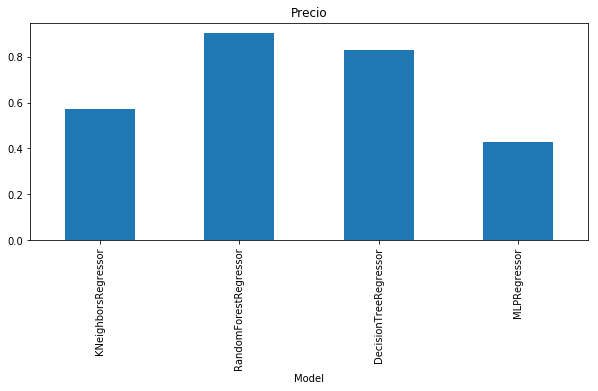

In [74]:
#Prueba 11

x_train, x_test, y_train, y_test = train_test_split(trainRooms, trainRooms['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [75]:
trainRoomsFeatures = trainRooms.drop('price_aprox_usd',1)
trainRoomsPrecios = trainRooms.loc[:, ['price_aprox_usd']]

In [76]:
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, trainRoomsFeatures, np.ravel(trainRoomsPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.33932918,  0.96574268,  0.88514576,  0.82730505,  0.89894078])

# Set de Test

In [77]:
oncePrueba = testRooms.drop('price_aprox_usd', axis=1)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(oncePrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(trainRoomsFeatures, trainRoomsPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba11 = RFRModel.predict(imp.fit_transform(oncePrueba))

In [78]:
archivo11 = pd.DataFrame()
archivo11['id'] = datosForTesting.loc[:,['id']]
archivo11['price_usd'] = prueba11
archivo11.to_csv('prueba11.csv', index=False)

# Otros modelos

In [67]:
datosForOtrosModelos = datosConComunas.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd','surface_covered_in_m2','property_type','comuna','year','month','tipo']]
datosForOtrosModelos = pd.get_dummies(datosForOtrosModelos)


trainModelos= datosForOtrosModelos[datosForOtrosModelos['tipo_train'] == 1]
testModelos = datosForOtrosModelos[datosForOtrosModelos['tipo_test'] == 1]


trainModelos = trainModelos.drop(['tipo_train','tipo_test'], axis=1)
testModelos = testModelos.drop(['tipo_train','tipo_test'], axis=1)

In [69]:

trainModelos = trainModelos.loc[trainModelos['surface_total_in_m2'].notnull(),:]
trainModelos = trainModelos.loc[trainModelos['surface_covered_in_m2'].notnull(),:]
trainModelos = trainModelos.loc[trainModelos['surface_covered_in_m2'] < trainModelos['surface_total_in_m2'],:]

trainModelos.drop_duplicates(subset=None, keep='first', inplace=True)

In [65]:
testModelos.sort_values(by='surface_total_in_m2', ascending=False)

,lat,lon,surface_total_in_m2,price_aprox_usd,surface_covered_in_m2,year,month,property_type_casa,property_type_departamento,property_type_ph,...,comuna_Comuna 19,comuna_Comuna 2.0,comuna_Comuna 20,comuna_Comuna 3.0,comuna_Comuna 4.0,comuna_Comuna 5.0,comuna_Comuna 6.0,comuna_Comuna 7.0,comuna_Comuna 8.0,comuna_Comuna 9.0
142429,-34.628497,-58.426861,148000.0,NaN,148000.0,2017,8,0,1,0,...,0,0,0,0,0,0,1,0,0,0
137280,-35.050945,-58.763096,42777.0,NaN,NaN,2017,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
142744,-34.661256,-58.724244,16350.0,NaN,6637.0,2017,8,1,0,0,...,1,0,0,0,0,0,0,0,0,0
143121,NaN,NaN,14446.0,NaN,120.0,2017,8,1,0,0,...,1,0,0,0,0,0,0,0,0,0
140647,NaN,NaN,13290.0,NaN,13290.0,2017,8,0,0,1,...,0,0,0,0,0,0,0,0,0,0
137089,-34.567801,-58.448832,9987.0,NaN,93.0,2017,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
139080,-34.635780,-58.869574,9017.0,NaN,148.0,2017,8,1,0,0,...,1,0,0,0,0,0,0,0,0,0
139071,-35.099745,-58.916470,8336.0,NaN,250.0,2017,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
143088,NaN,NaN,8050.0,NaN,75.0,2017,8,1,0,0,...,1,0,0,0,0,0,0,0,0,0
139074,-34.615374,-58.396282,7710.0,NaN,5160.0,2017,8,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
trainModelos.sort_values(by='price_aprox_usd', ascending=False)

,lat,lon,surface_total_in_m2,price_aprox_usd,surface_covered_in_m2,year,month,property_type_casa,property_type_departamento,property_type_ph,...,comuna_Comuna 19,comuna_Comuna 2.0,comuna_Comuna 20,comuna_Comuna 3.0,comuna_Comuna 4.0,comuna_Comuna 5.0,comuna_Comuna 6.0,comuna_Comuna 7.0,comuna_Comuna 8.0,comuna_Comuna 9.0
12665,-34.559383,-58.604909,80.0,35000000.00,45.0,2015,4,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8851,-34.476579,-58.488496,14631.0,14000000.00,1647.0,2015,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
133972,-34.657171,-58.682625,150.0,12000000.00,85.0,2017,7,1,0,0,...,1,0,0,0,0,0,0,0,0,0
100057,-34.463217,-58.556603,1902.0,11111111.00,404.0,2016,10,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17259,-34.574750,-58.421124,800.0,8000000.00,0.0,2015,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14371,-34.575080,-58.420518,780.0,8000000.00,0.0,2015,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
102812,-34.575215,-58.421028,800.0,7500000.00,750.0,2016,12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
13057,-34.505714,-58.480485,1158.0,7100000.00,0.0,2015,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13426,-34.575522,-58.422299,120.0,6800000.00,119.0,2015,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
74016,-34.416329,-58.650990,1548.0,6500000.00,1400.0,2017,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
testModelos.sort_values(by='surface_total_in_m2', ascending=False)

,lat,lon,surface_total_in_m2,price_aprox_usd,surface_covered_in_m2,year,month,property_type_casa,property_type_departamento,property_type_ph,...,comuna_Comuna 19,comuna_Comuna 2.0,comuna_Comuna 20,comuna_Comuna 3.0,comuna_Comuna 4.0,comuna_Comuna 5.0,comuna_Comuna 6.0,comuna_Comuna 7.0,comuna_Comuna 8.0,comuna_Comuna 9.0
142429,-34.628497,-58.426861,148000.0,NaN,148000.0,2017,8,0,1,0,...,0,0,0,0,0,0,1,0,0,0
137280,-35.050945,-58.763096,42777.0,NaN,NaN,2017,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
142744,-34.661256,-58.724244,16350.0,NaN,6637.0,2017,8,1,0,0,...,1,0,0,0,0,0,0,0,0,0
143121,NaN,NaN,14446.0,NaN,120.0,2017,8,1,0,0,...,1,0,0,0,0,0,0,0,0,0
140647,NaN,NaN,13290.0,NaN,13290.0,2017,8,0,0,1,...,0,0,0,0,0,0,0,0,0,0
137089,-34.567801,-58.448832,9987.0,NaN,93.0,2017,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
139080,-34.635780,-58.869574,9017.0,NaN,148.0,2017,8,1,0,0,...,1,0,0,0,0,0,0,0,0,0
139071,-35.099745,-58.916470,8336.0,NaN,250.0,2017,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
143088,NaN,NaN,8050.0,NaN,75.0,2017,8,1,0,0,...,1,0,0,0,0,0,0,0,0,0
139074,-34.615374,-58.396282,7710.0,NaN,5160.0,2017,8,0,1,0,...,0,0,0,1,0,0,0,0,0,0


C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


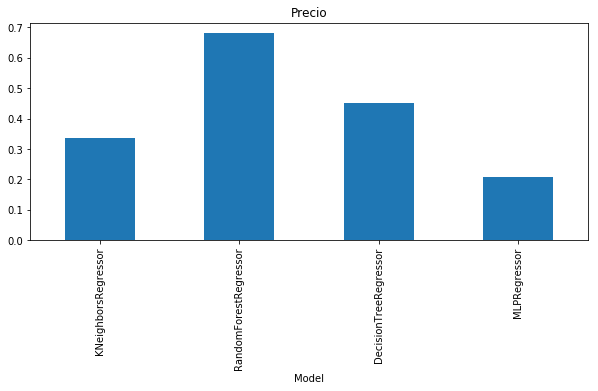

In [74]:

#clf.fit(X_train, y_train)
         #ensemble.GradientBoostingClassifier({'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
         #          'min_samples_split': 5})

x_train, x_test, y_train, y_test = train_test_split(trainModelos, trainModelos['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [58]:
trainModelosFeatures = trainModelos.drop('price_aprox_usd',1)
trainModelosPrecios = trainModelos.loc[:, ['price_aprox_usd']]

In [59]:
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, trainModelosFeatures, np.ravel(trainModelosPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.2635454 ,  0.73720301,  0.73433505,  0.69242042,  0.66763499])

# Set de Entrenamiento

In [61]:
docePrueba = testModelos.drop('price_aprox_usd', axis=1)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(docePrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(trainModelosFeatures, trainModelosPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba12 = RFRModel.predict(imp.fit_transform(docePrueba))

In [62]:
archivo12 = pd.DataFrame()
archivo12['id'] = datosForTesting.loc[:,['id']]
archivo12['price_usd'] = prueba12
archivo12.to_csv('prueba12.csv', index=False)

# Reducimos cantidad de Precios y sacamos covered m2

In [75]:

datosForOtrosModelos = datosConComunas.loc[:, ['lat', 'lon', 'surface_total_in_m2','price_aprox_usd','property_type','comuna','year','month','tipo']]
datosForOtrosModelos = pd.get_dummies(datosForOtrosModelos)


trainModelos= datosForOtrosModelos[datosForOtrosModelos['tipo_train'] == 1]
testModelos = datosForOtrosModelos[datosForOtrosModelos['tipo_test'] == 1]


trainModelos = trainModelos.drop(['tipo_train','tipo_test'], axis=1)
testModelos = testModelos.drop(['tipo_train','tipo_test'], axis=1)

trainModelosTenMillon = trainModelos.loc[trainModelos['price_aprox_usd'] < 11000000,:]

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


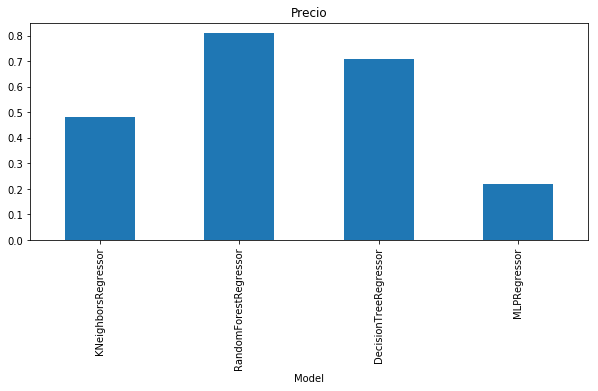

In [77]:

#clf.fit(X_train, y_train)
         #ensemble.GradientBoostingClassifier({'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
         #          'min_samples_split': 5})

x_train, x_test, y_train, y_test = train_test_split(trainModelosTenMillon, trainModelosTenMillon['price_aprox_usd'], test_size=0.2)
#x_test = x_test.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]
#x_train = x_train.loc[:, ['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2','property_type_id','rooms']]

x_test = x_test.drop('price_aprox_usd',1)
x_train = x_train.drop('price_aprox_usd',1)


models = [KNeighborsRegressor(),
         RandomForestRegressor(n_estimators=100, max_features='sqrt'),
         tree.DecisionTreeRegressor(),
         neural_network.MLPRegressor()]
 
TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(x_train, y_train)
        tmp['Precio'] = r2_score(y_test, model.predict(x_test))
        TestModels = TestModels.append([tmp])
 
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.Precio.plot(ax=axes, kind='bar', title='Precio')

In [80]:
trainModelosTenMillonFeatures = trainModelosTenMillon.drop('price_aprox_usd',1)
trainModelosTenMillonPrecios = trainModelosTenMillon.loc[:, ['price_aprox_usd']]

In [81]:
RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
scores = cross_val_score(RFRModel, trainModelosTenMillonFeatures, np.ravel(trainModelosTenMillonPrecios.loc[:, ['price_aprox_usd']]), cv=5)
scores

array([ 0.56738843,  0.91783724,  0.85820004,  0.80135998,  0.85390676])

# Set Datos 

In [84]:
catorcePrueba = testModelos.drop('price_aprox_usd', axis=1)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit_transform(catorcePrueba)

RFRModel = RandomForestRegressor(n_estimators=100, max_features='sqrt')
x_train, x_test, y_train, y_test = train_test_split(trainModelosTenMillonFeatures, trainModelosTenMillonPrecios['price_aprox_usd'], test_size=0.2)
RFRModel.fit(x_train, y_train)
prueba14 = RFRModel.predict(imp.fit_transform(catorcePrueba))

In [85]:
archivo14 = pd.DataFrame()
archivo14['id'] = datosForTesting.loc[:,['id']]
archivo14['price_usd'] = prueba14
archivo14.to_csv('prueba14.csv', index=False)